In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud ,STOPWORDS
from bs4 import BeautifulSoup
import re , string , unicodedata
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet


In [2]:
df = pd.read_csv("news.csv",encoding='latin-1')

In [3]:
df['category']=df.label.map({'REAL':1 , 'FAKE':0})

In [4]:
df.head()

,Unnamed: 0,title,text,label,category
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1


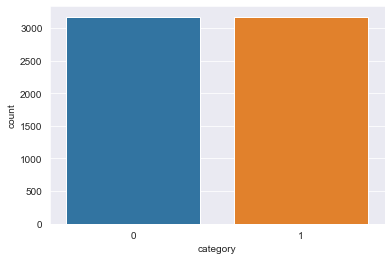

In [5]:
sns.set_style("darkgrid")
sns.countplot(df.category)

In [6]:
#checking for nan values

df.isna().sum()    

Unnamed: 0    0
title         0
text          0
label         0
category      0
dtype: int64

In [7]:
df.title.count()

6335

In [8]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

[Text(0, 0, 'FAKE'), Text(0, 0, 'REAL')]

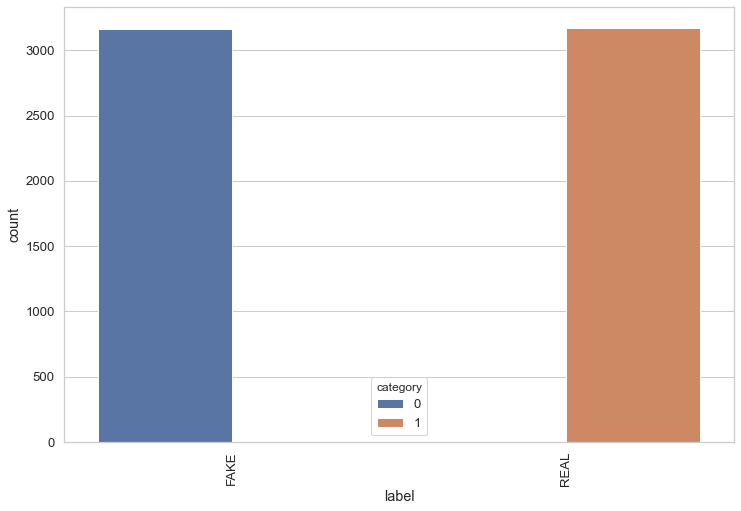

In [9]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "label",hue ="category",data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [10]:
df['text']=df['text']+" "+df['title']
del df['title']
del df['Unnamed: 0']


In [11]:
df

,text,label,category
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE,0
4,It's primary day in New York and front-runners...,REAL,1
...,...,...,...
6330,The State Department told the Republican Natio...,REAL,1
6331,The âPâ in PBS Should Stand for âPlutocr...,FAKE,0
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,0
6333,"ADDIS ABABA, Ethiopia âPresident Obama conve...",REAL,1


# Stop Words

In [12]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df.text.loc[12]

"Click Here To Learn More About Alexandra's Personalized Essences Psychic Protection Click Here for More Information on Psychic Protection! Implant Removal Series Click here to listen to the IRP and SA/DNA Process Read The Testimonials Click Here To Read What Others Are Experiencing! Copyright Â© 2012 by Galactic Connection. All Rights Reserved. \nExcerpts may be used, provided that full and clear credit is given to Alexandra Meadors and www.galacticconnection.com with appropriate and specific direction to the original content. Unauthorized use and/or duplication of any material on this website without express and written permission from its author and owner is strictly prohibited. Thank you. \nPrivacy Policy \nBy subscribing to GalacticConnection.com you acknowledge that your name and e-mail address will be added to our database. As with all other personal information, only working affiliates of GalacticConnection.com have access to this data. We do not give GalacticConnection.com add

In [14]:
df.text.loc[6000]

'If humans were largely moral and ethical beings, then globalization could be a workable proposition. Unfortunately, the dark behavioral narcissism expressed by compulsive greed and an infinite appetite for power seems to have become the guiding precept of our collective nightmare. If only the desire to dominate others and have a lot more than them were not the prime motivations for the global elite on top of the human food chain, we could all have our respective modest slice of happiness on this planet. The Utopia of globalization through institutions such as the United Nations (UN), World Bank , and International Monetary Fund (IMF) was supposed to eradicate the universal pestilence of war, extreme poverty , hunger and slavery using the might of the above supranational institutions to prevent the rise of so-called rogue nations usually ruled by dictators.\nWorld order of chaos with misery for profit\nThe opportunity of this push for a supranational form of government has to be unders

# Data Cleaning process

In [15]:
def strip_html(text):
    soup = BeautifulSoup( text , "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
        return re.sub('\[[^]]*\]','',text)
    
#Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+','',text)

#Removing the stopwords from text
def remove_stopwords (text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)  #converts list to string

#Remove the noisy text
def denoise_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)   #re is regular expression   #here anything between square brackets are removed
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)         #punctuation are removed 
    text = re.sub('\w*\d\w*','',text)          
    text = strip_html(text)
   # text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

#Apply function on review column
df['text'] = df['text'].apply(denoise_text)

In [16]:
df.text.loc[500]

'anonymous hacker deric lostutter faces years prison steubenville rapists walk free please scroll video deric lostutter part group affiliated anonymous exposed rapists underage girl steubenville ohio actions eventually helped highlight terrible crime young woman helped bring perpetrators justice received thanks law enforcement instead elected put trial felony hacking found guilty face sixteen years prison incidentally rapists also found guilty trial already completed exceptionally short detention sentences steubenville hacker indicted bringing rapists justice sobering details steubenville rape case detailed heavily perpetrators came trial members local football team gang raped high school girl posted pictures social media posts bragging done two perpetrators ever arrested charges rape kidnap trent may maâ\x80\x99lik richmond received far local support victim initially local authorities showed reluctance prosecute perpetrators senseless violent act owing privileged place local society l

In [17]:
df.text.loc[12]

'click learn alexandras personalized essences psychic protection click information psychic protection implant removal series click listen irp sadna process read testimonials click read others experiencing copyright â© galactic connection rights reserved excerpts may used provided full clear credit given alexandra meadors wwwgalacticconnectioncom appropriate specific direction original content unauthorized use andor duplication material website without express written permission author owner strictly prohibited thank privacy policy subscribing galacticconnectioncom acknowledge name email address added database personal information working affiliates galacticconnectioncom access data give galacticconnectioncom addresses outside companies ever rent sell email address email send galacticconnectioncom completely confidential therefore add name email list without permission continue reading galactic connection design development aa superluminal systems sign forour newsletter join newsletter 

In [18]:
df.text.loc[100]

'highprofile supreme court gunrights case called district columbia v heller brief filed eighth floor price daniel sr state office building austin texas specifically corner office man stateâ\x80\x99s solicitor general ted cruz brief took strong stance divisive question whether second amendment establishes individual right guns protects state local militias brief argued forcefully first view writing â\x80\x9cthe individual right keep bear armsâ\x80\x9d â\x80\x9cfundamental rightâ\x80\x9d â\x80\x9can individual right altogether abrogated right allâ\x80\x9d thirty attorneys general states signed today white house pushing new gun restrictions cruzs candidacy riding next months iowa caucuses surprise texas republican would embrace gun rights defining issue holding event firing range even raffling engraved shotgun campaign promotion situation different wading case immediate connection texas see signature r ted cruz brief would surprised nine supreme court justices least time cruz solicitor ge

# Wordcloud for REAL text whose LABEL is 1

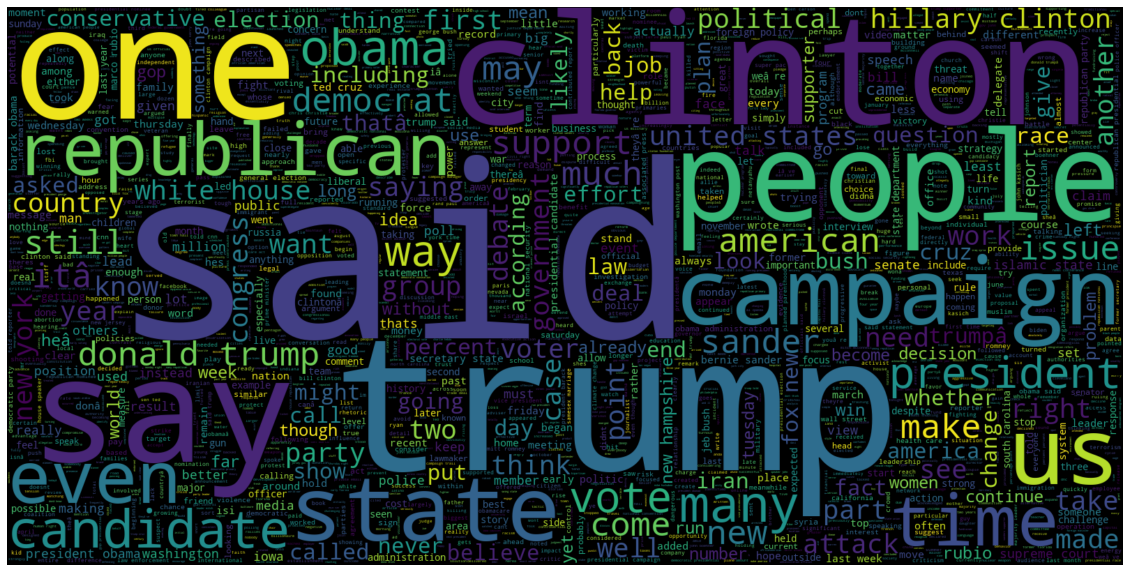

In [19]:
plt.figure( figsize = (20,20))   #Text that is not Fake
wc = WordCloud(max_words = 2000, width = 1600 , height = 800, stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()
#wordcloud is a visualization useful for finding data insights

# Wordcloud for FAKE text whose LABEL is 0

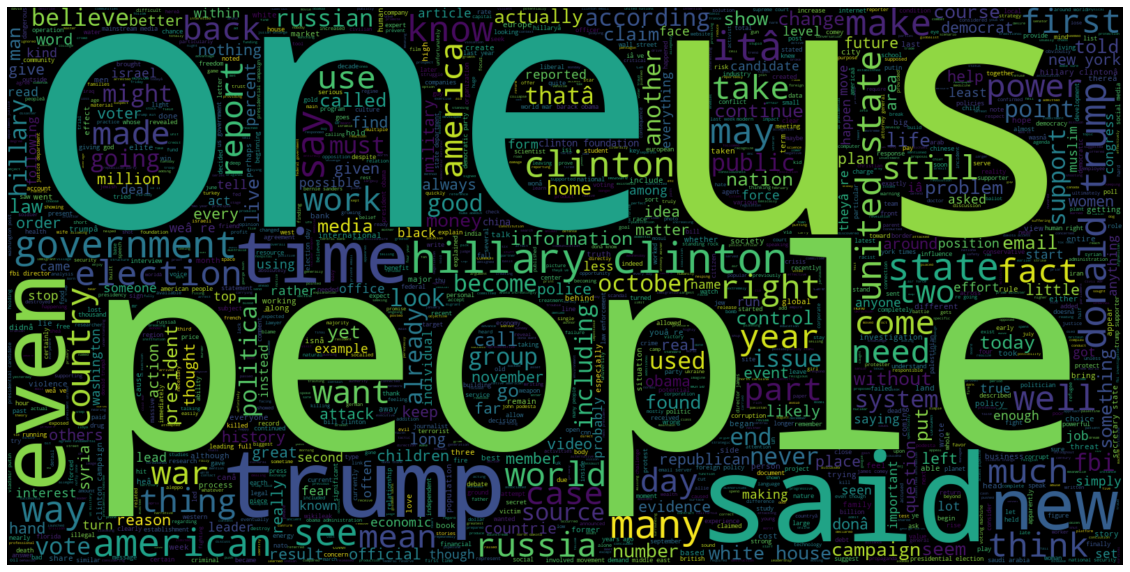

In [20]:
plt.figure( figsize = (20,20))   #Text that is Fake
wc = WordCloud(max_words = 2000, width = 1600 , height = 800, stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Number of characters in texts

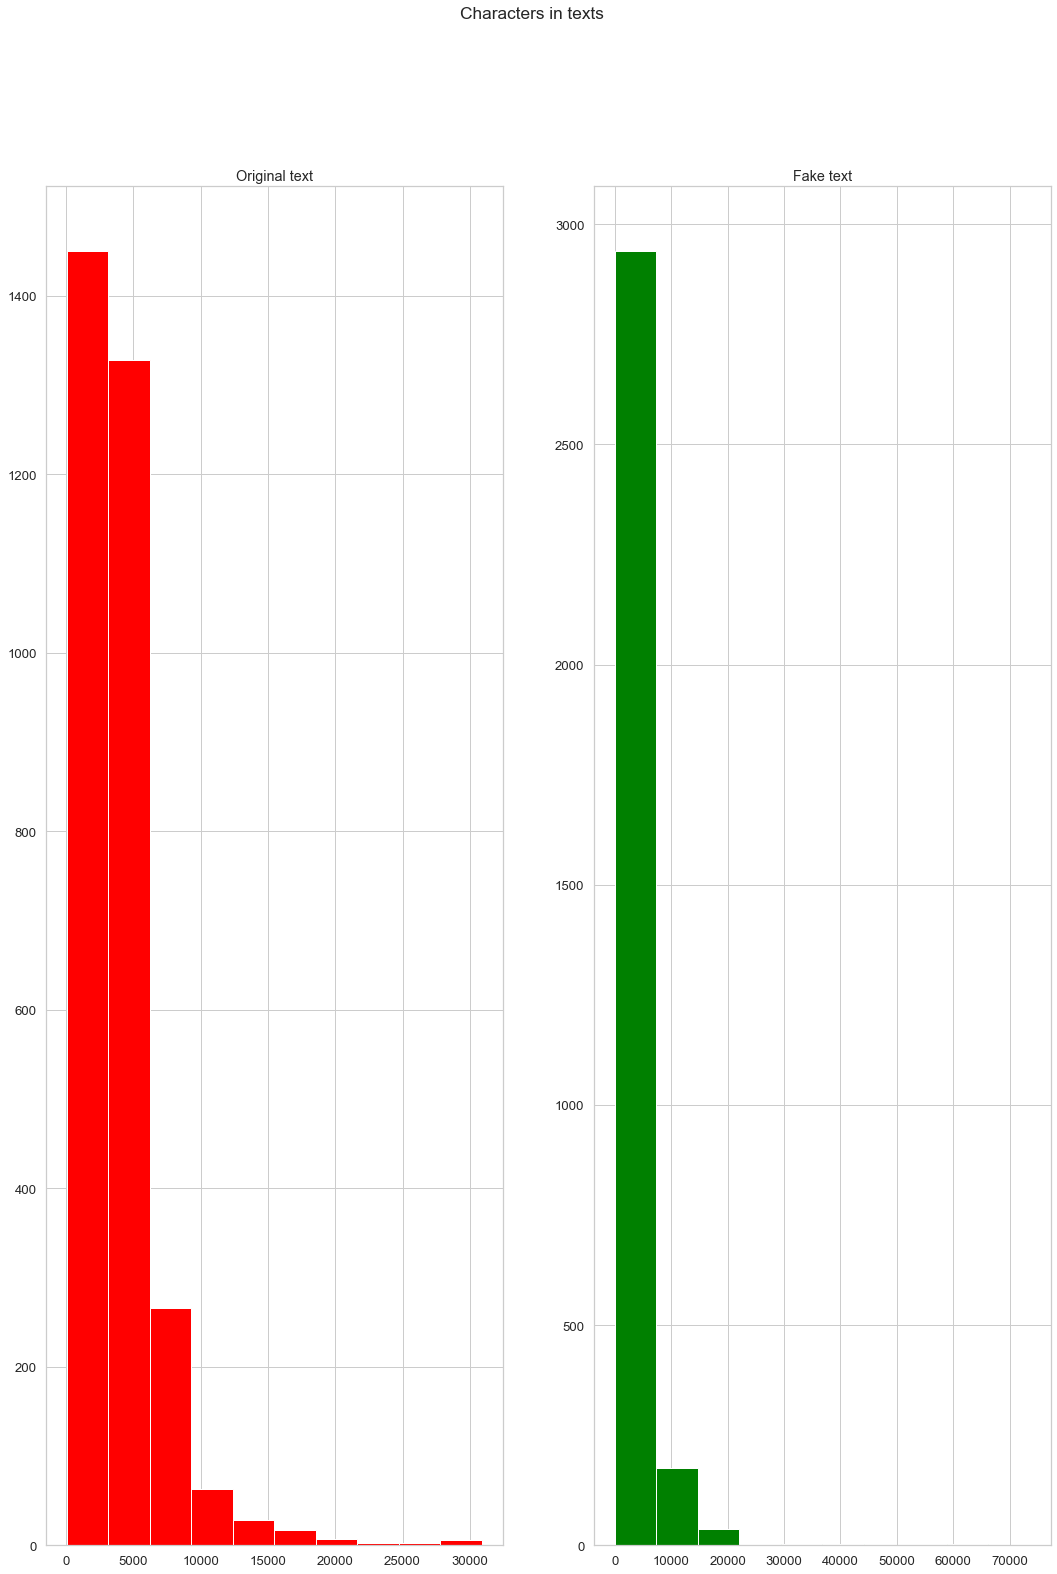

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,25))
text_len=df[df['category']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['category']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

In [22]:
df['text_len']=df.text.apply(len)
df[df['category']==1]['text_len'].describe()

count     3171.000000
mean      3782.932513
std       3075.938421
min         56.000000
25%       1953.500000
50%       3348.000000
75%       4884.000000
max      30906.000000
Name: text_len, dtype: float64

In [23]:
df[df['category']==0]['text_len'].describe()

count     3164.000000
mean      2946.471555
std       3872.109770
min          9.000000
25%        968.000000
50%       1853.000000
75%       3605.000000
max      73552.000000
Name: text_len, dtype: float64

# On an average original text has 3786 characters in text which is the most common (mean) while around 2942 characters in text are most common in fake text category

# Average word length in a text

Text(0.5, 0.98, 'Average word length in each text')

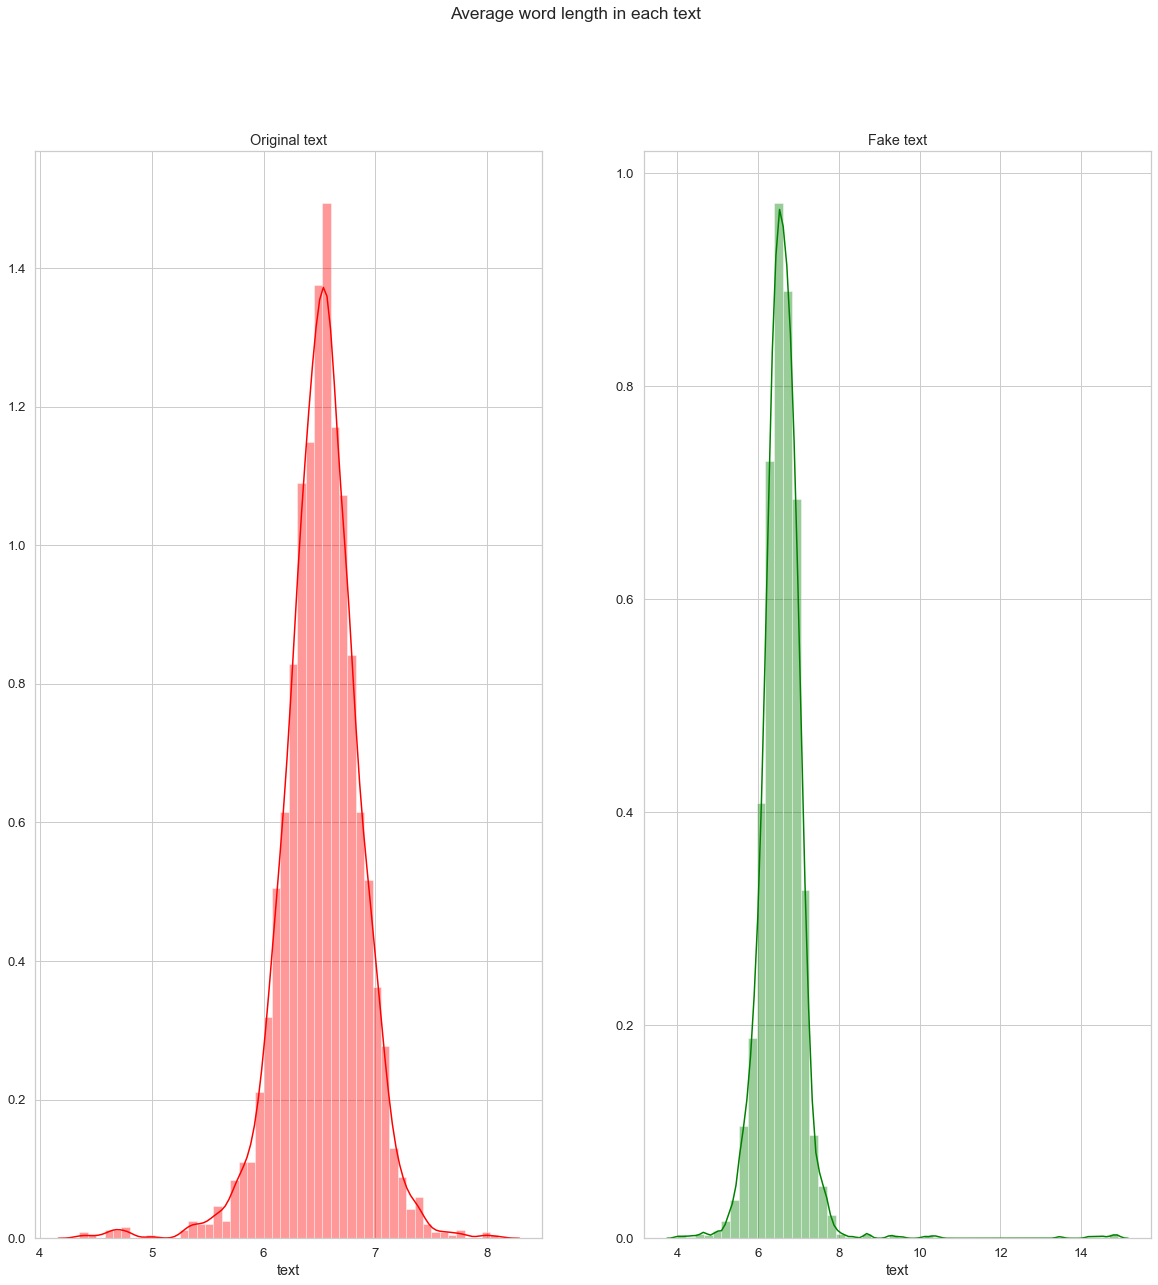

In [24]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))
word=df[df['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

# Frequency of words

In [25]:
from collections import Counter
words = df[df.category == 1].text.apply(lambda x : [word.lower() for word in x.split()])

real_words = Counter()
for i in words:
    real_words.update(i)
    
print(real_words.most_common(50))

[('said', 17050), ('trump', 12855), ('clinton', 8938), ('would', 7758), ('one', 6212), ('â\x80\x94', 6015), ('people', 5913), ('new', 5826), ('us', 5679), ('president', 5572), ('state', 5523), ('campaign', 5363), ('also', 5011), ('republican', 4883), ('obama', 4809), ('could', 4078), ('states', 3991), ('like', 3804), ('time', 3575), ('sanders', 3567), ('party', 3534), ('even', 3516), ('house', 3515), ('two', 3369), ('percent', 3339), ('political', 3338), ('many', 3235), ('first', 3230), ('republicans', 3187), ('voters', 3138), ('presidential', 3084), ('democratic', 3046), ('going', 2933), ('last', 2927), ('told', 2847), ('say', 2808), ('white', 2791), ('years', 2775), ('get', 2769), ('cruz', 2759), ('news', 2590), ('make', 2578), ('hillary', 2573), ('gop', 2572), ('think', 2564), ('former', 2544), ('much', 2459), ('american', 2440), ('support', 2387), ('says', 2360)]


In [26]:
from collections import Counter
words = df[df.category == 0].text.apply(lambda x : [word.lower() for word in x.split()])

fake_words = Counter()
for i in words:
    fake_words.update(i)
    
print(fake_words.most_common(50))

[('us', 6953), ('trump', 6002), ('clinton', 5886), ('people', 5111), ('would', 4878), ('one', 4800), ('hillary', 4410), ('said', 3980), ('new', 3571), ('â\x80\x93', 3347), ('like', 3208), ('also', 3182), ('election', 3061), ('even', 2889), ('world', 2878), ('time', 2809), ('state', 2697), ('government', 2595), ('â\x80\x94', 2591), ('many', 2567), ('could', 2516), ('president', 2464), ('war', 2429), ('american', 2363), ('states', 2240), ('years', 2179), ('itâ\x80\x99s', 2166), ('first', 2128), ('campaign', 2121), ('get', 2077), ('media', 2071), ('know', 1957), ('may', 1955), ('obama', 1947), ('fbi', 1934), ('donald', 1907), ('two', 1904), ('russia', 1893), ('political', 1826), ('way', 1793), ('united', 1760), ('see', 1729), ('make', 1714), ('going', 1700), ('news', 1695), ('think', 1681), ('well', 1655), ('country', 1595), ('much', 1550), ('public', 1539)]


Counter is for counting hashable objects . It is a unordered collection where elements are stored as a dictionary keys and their counts are stored as dictionary values

Counter supports many methods.One of them is most_common()

# Vectorization

The corpus should be first converted to matrix of token counts i.e. document term matrix

In [27]:
df   #corpus of document is df.text

,text,label,category,text_len
0,daniel greenfield shillman journalism fellow f...,FAKE,0,5146
1,google pinterest digg linkedin reddit stumbleu...,FAKE,0,1853
2,us secretary state john f kerry said monday st...,REAL,1,1836
3,â kaydee king kaydeeking november lesson ton...,FAKE,0,2005
4,primary day new york frontrunners hillary clin...,REAL,1,1276
...,...,...,...,...
6330,state department told republican national comm...,REAL,1,2984
6331,âpâ pbs stand âplutocraticâ âpentago...,FAKE,0,10967
6332,antitrump protesters tools oligarchy âreform ...,FAKE,0,8396
6333,addis ababa ethiopia âpresident obama conven...,REAL,1,5226


# Split the data into training and testing dataset

In [28]:
X_train , X_test,y_train,y_test = train_test_split(df['text'],df['category'],random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4751,)
(1584,)
(4751,)
(1584,)


In [29]:
# Vectorizing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
data_cv = cv.fit_transform(df.text)
data_dtm = pd.DataFrame(data_cv.toarray(),columns = cv.get_feature_names())
data_dtm.index = df.index
data_dtm            #document term matrix - dtm     #transforming the whole dataset

,aa,aaa,aaaa,aaaaadd,aaaasetlayoutnew,aaas,aab,aachen,aachenâ,aadhar,...,ð¾ðºñ,øª,øªø,øªø¹ø,øªù,øªû,ø²û,ø³ø,ø¹ø,ø¹ù
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_train_dtm = cv.fit_transform(X_train)
X_train_dtm


<4751x78107 sparse matrix of type '<class 'numpy.int64'>'
	with 1258722 stored elements in Compressed Sparse Row format>

In [31]:
X_test_dtm = cv.transform(X_test)
X_test_dtm

<1584x78107 sparse matrix of type '<class 'numpy.int64'>'
	with 399274 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)
#this data is to be fed to the algorithm

<4751x78107 sparse matrix of type '<class 'numpy.float64'>'
	with 1258722 stored elements in Compressed Sparse Row format>

# Building and evaluating a model


In [33]:
#import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [34]:
#train the model using X_train_dtm 
%time nb.fit(X_train_dtm , y_train)

Wall time: 534 ms


MultinomialNB()

In [35]:
#make class predictions for X_test_dtm
y_pred = nb.predict(X_test_dtm)

In [36]:
# calculate accuracy of class predictions 
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9015151515151515

In [37]:
metrics.confusion_matrix(y_test,y_pred)

array([[678, 111],
       [ 45, 750]], dtype=int64)

In [38]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('bow',CountVectorizer()),('tfid',TfidfTransformer()),('model',MultinomialNB())])
pipe.fit(X_train ,y_train)
y_pred = pipe.predict(X_test)
metrics.accuracy_score(y_test,y_pred)
metrics.confusion_matrix(y_test,y_pred)

array([[509, 280],
       [ 10, 785]], dtype=int64)

In [39]:
metrics.accuracy_score(y_test,y_pred)

0.8169191919191919

In [40]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
pred = model.predict(X_test)
metrics.accuracy_score(y_test,pred)
metrics.confusion_matrix(y_test,pred)
#print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))

array([[741,  48],
       [ 81, 714]], dtype=int64)

In [41]:
metrics.accuracy_score(y_test,pred)

0.9185606060606061